<a href="https://colab.research.google.com/github/NishthaKumar/Remote-Sensing-SoilMoisture/blob/main/Soil_Moisture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 18.7 MB/s eta 0:00:00


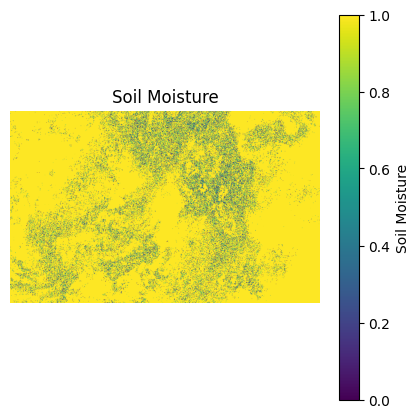

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def calculate_soil_moisture(ndvi_path, lst_path, output_path, a, b, c, d):
    with rasterio.open(ndvi_path) as ndvi_ds:
        ndvi = ndvi_ds.read(1)

    with rasterio.open(lst_path) as lst_ds:
        lst = lst_ds.read(1)
        profile = lst_ds.profile

    lst_wet = a - b * ndvi
    lst_dry = d - c * ndvi

    soil_moisture = (lst_dry - lst) / (lst_dry - lst_wet)
    soil_moisture = np.clip(soil_moisture, 0, 1)

    profile.update(dtype=rasterio.float32, count=1)

    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(soil_moisture, 1)

ndvi_path = 'ndvi.tiff'
lst_path = 'temp.tiff'
output_path = 'soil_moisture.tif'
coefficients = (310, 17, 15, 320)

calculate_soil_moisture(ndvi_path, lst_path, output_path, *coefficients)

with rasterio.open(output_path) as soil_moisture_ds:
    soil_moisture_data = soil_moisture_ds.read(1)

plt.figure(figsize=(5, 5))
plt.title('Soil Moisture')
plt.imshow(soil_moisture_data, cmap='viridis')
plt.colorbar(label='Soil Moisture')
plt.axis('off')
plt.show()


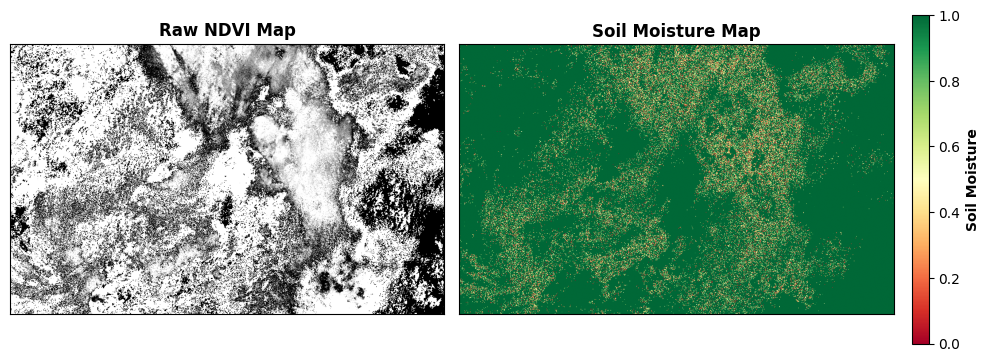

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def plot_soil_moisture(raster_path, ax):
    with rasterio.open(raster_path) as ds:
        soil_moisture = ds.read(1)

    cmap = plt.colormaps['RdYlGn']
    im = ax.imshow(soil_moisture, cmap=cmap, vmin=0, vmax=1)
    cbar = plt.colorbar(im, ax=ax, fraction=0.035, pad=0.04)
    cbar.set_label('Soil Moisture', fontweight='bold')
    ax.set_title('Soil Moisture Map', fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])

def plot_raw_raster(raster_path, ax):
    with rasterio.open(raster_path) as ds:
        data = ds.read(1)

    im = ax.imshow(data, cmap='gray')
    ax.set_title('Raw NDVI Map', fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])

soil_moisture_path = 'soil_moisture.tif'
ndvi_path = 'ndvi.tiff'

fig, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 1.08]})

plot_soil_moisture(soil_moisture_path, axs[1])
plot_raw_raster(ndvi_path, axs[0])

plt.tight_layout()
plt.show()